## Wine Quality Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Pre-Processing

In [2]:
wine_df=pd.read_csv('wine_quality_red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

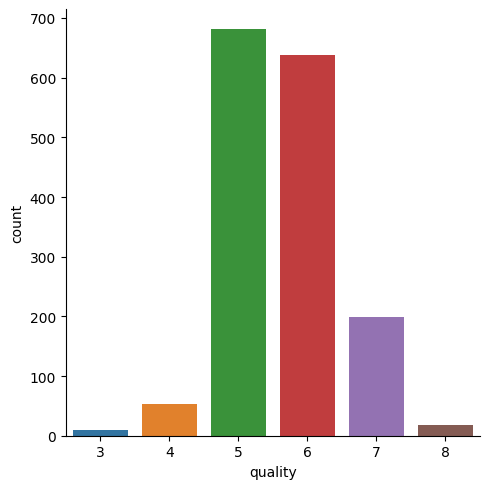

In [8]:
import seaborn as sns

sns.catplot(x='quality', data=wine_df, kind='count')

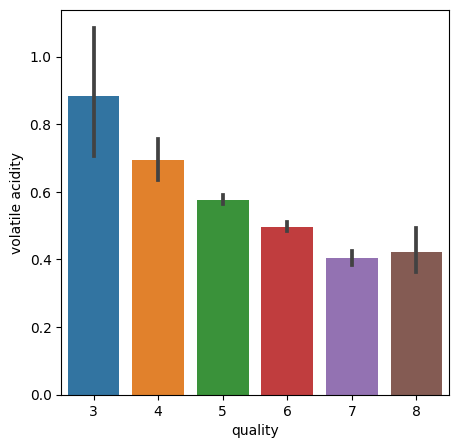

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile acidity', data=wine_df)
plt.show()

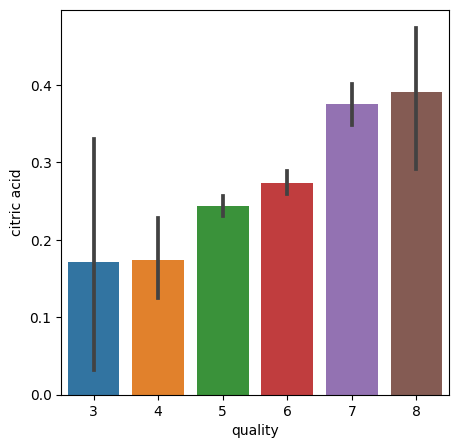

In [10]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='citric acid', data=wine_df)
plt.show()

In [13]:
# Correlation of all columns w.r.t quality
correlation=wine_df.corr()

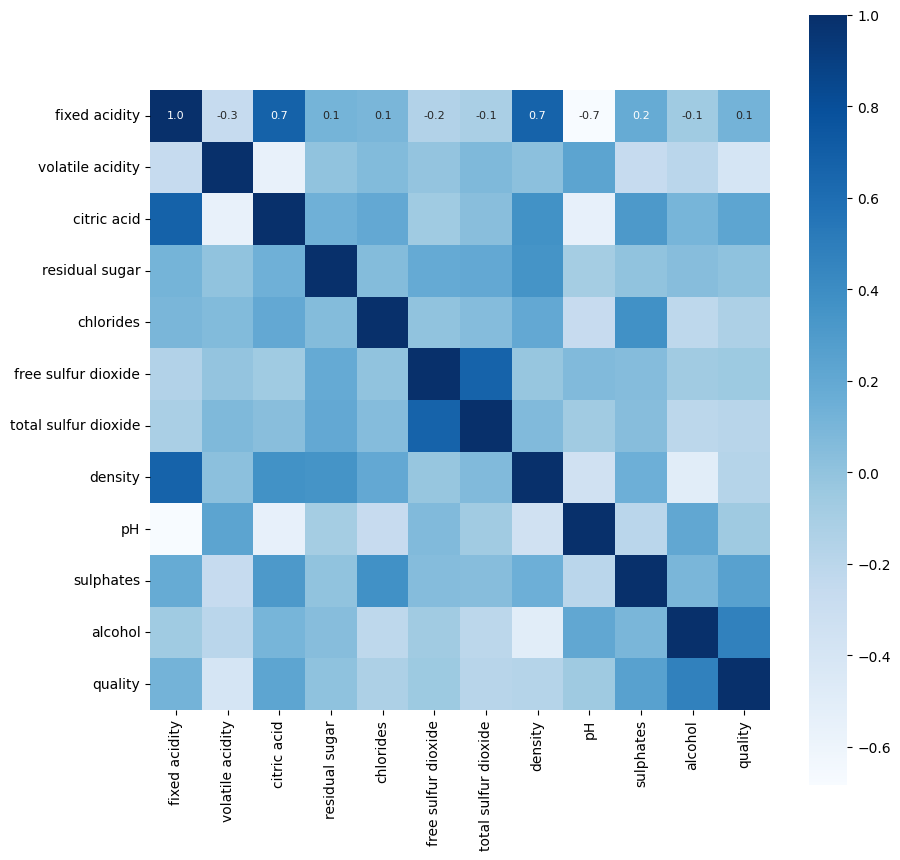

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)
plt.show()

In [15]:
x=wine_df.drop(columns='quality', axis=1)
y=wine_df['quality'].apply(lambda y_val:1 if y_val>=7 else 0)

In [16]:
x.shape

(1599, 11)

In [17]:
y.shape

(1599,)

In [18]:
x_train, x_test, y_train, y_test=train_test_split(
    x, y,
    test_size=0.2,
    random_state=3
)

In [19]:
x_train.shape

(1279, 11)

In [20]:
x_test.shape

(320, 11)

### Model Training

In [21]:
model=RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=3
)

In [22]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=3)

In [23]:
train_data_prediction=model.predict(x_train)

In [24]:
train_acc_score=accuracy_score(y_train, train_data_prediction)
print(train_acc_score)

0.924941360437842


In [25]:
test_data_prediction=model.predict(x_test)

In [26]:
test_acc_score=accuracy_score(y_test, test_data_prediction)
print(test_acc_score)

0.903125


In [28]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))